#                           **Customer Conversion Prediction**

## Basic Analysis of Dataset from Problem Statement and Features



*   It is a supervised learning problem - We are predicting target variable

*   From target varible we can clearly understand it is a classification problem
*   From target variable we can tell it is a binary classification problem. target = (y/n)





# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

# Loading Dataset

In [2]:
df=pd.read_csv("/content/customerconversionprediction.csv")


# Data Analysis

In [3]:
# Checking size(rows,columns) of dataset
df.shape

(45211, 11)

In [4]:
#To display top 5 row in dataset
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [5]:
#To display Bottom 5 rows
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [6]:
#To view the column names
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

# **Data Preprocessing**

# **Data Cleaning**

## Missing Values

In [7]:
#checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

There is no null values in the dataset

## Finding Duplicate Values

In [8]:
#checking for no of duplicate values
df.duplicated().sum()
     

6

There are 6 duplicate datas in the  dataset. So will drop the duplicates.

In [9]:
#droping duplicates
df = df.drop_duplicates()

In [10]:
#after droping again check for no of duplicates
df.duplicated().sum()

0

There is no duplictes,Duplicates are removed from dataset.

# Checking Data Type

In [11]:
df.dtypes
     

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

There is no need to change any datatype of the columns

# Unique Values of Categorical Column

In [12]:
print("Unique values of Job \n")
print(df['job'].unique())

Unique values of Job 

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [13]:
print("Unique values of Marital Status \n")
print(df['marital'].unique())

Unique values of Marital Status 

['married' 'single' 'divorced']


In [14]:
print("Unique values of Educationsl Qualification \n")
print(df['education_qual'].unique())

Unique values of Educationsl Qualification 

['tertiary' 'secondary' 'unknown' 'primary']


In [15]:
print("Unique values of Call Type \n")
print(df['call_type'].unique())

Unique values of Call Type 

['unknown' 'cellular' 'telephone']


In [16]:
print("Unique values of Month \n")
print(df['mon'].unique())

Unique values of Month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


In [17]:
print("Unique values of Previous Outcome \n")
print(df['prev_outcome'].unique())

Unique values of Previous Outcome 

['unknown' 'failure' 'other' 'success']


In [18]:
print("Unique values of Target Variable 'y' \n")
print(df['y'].unique())

Unique values of Target Variable 'y' 

['no' 'yes']


From all the above results all values are unique which means there is no incorrect or wrong data that is spelling mistake, upper case and lower case mismatch of each values.

# Replace the unknown values

In [19]:
df[df=='unknown'].count()

age                   0
job                 288
marital               0
education_qual     1857
call_type         13017
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36953
y                     0
dtype: int64

In [20]:
df['target'] = df["y"].map({"yes":1 , "no": 0})

In [21]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes,1
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes,1
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no,0


**JOB**

In [22]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [23]:
# Count of unknown values
job_uc = df['job'][df['job']=='unknown'].count()
job_uc

288

In [24]:
job_ucp = (job_uc/len(df['job']))*100
print(f'{round(job_ucp, 2)}% of job column is unknown')

0.64% of job column is unknown


In [25]:
# Imputing job column
df['job'].replace('unknown', df['job'].mode()[0], inplace=True)

In [26]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [27]:
#no of counts for particular job
df.job.value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

**education_qual**

In [28]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [29]:
# Count of unknown values
education_qual_uc = df['education_qual'][df['education_qual']=='unknown'].count()
education_qual_uc

1857

In [30]:
education_qual_ucp = (education_qual_uc/len(df['education_qual']))*100
print(f'{round(education_qual_ucp, 2)}% of education_qual is unknown')

4.11% of education_qual is unknown


In [31]:
# Imputing education_qual column
df['education_qual'].replace('unknown', df['education_qual'].mode()[0], inplace=True)

In [32]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [33]:
#no of counts for particular education_qual
df.education_qual.value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

**call_type Column**

In [34]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [35]:
ct_uc = df['call_type'][df['call_type']=='unknown'].count()
ct_uc

13017

In [36]:
ct_ucp = ct_uc/len(df['call_type'])*100
print(f'{round(ct_ucp, 2)}% of unknown in call_type column')

28.8% of unknown in call_type column


In [37]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

**prev_outcome Column**

In [38]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [39]:
po_uc = df['prev_outcome'][df['prev_outcome']=='unknown'].count()
po_uc

36953

In [40]:
po_ucp = po_uc/df['prev_outcome'].count()*100
print(f'{po_ucp}% of prev_outcome Column is unknown')

81.74538214799247% of prev_outcome Column is unknown


In [41]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

# **Outlier Deduction and Correction**

In [42]:
df.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


**Age**

**IQR**

In [43]:
#detecting Outlier for Age column
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)
upper_threshold = df['age'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['age'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(70.5, 10.5)

outlier present in age column,so we have to remove outlier.

**Removing outlier for** **Age**

In [44]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.age	 = df.age	.clip(lower_threshold, upper_threshold)

**Day**

**IQR**

In [45]:
#detecting Outlier for day column
iqr = df['day'].quantile(0.75) - df['day'].quantile(0.25)
upper_threshold = df['day'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['day'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(40.5, -11.5)

no outlier present in day column.

**DURATION**

**IQR**

In [46]:
#detecting Outlier for dur	 column
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold = df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['dur'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(643.0, -221.0)

outlier present in dur column,so we have to remove outlier.

In [47]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.dur	 = df.dur	.clip(lower_threshold, upper_threshold)

**No of Calls**

**IQR**

In [48]:
#detecting Outlier for num_calls column
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold = df['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_threshold, lower_threshold

(6.0, -2.0)

outlier present in num_calls column,so we have to remove outlier.

In [49]:
#removing outlier for age column
# Clip/ Strip is used to detuct value to lower & upper threshold.
df.num_calls	 = df.num_calls	.clip(lower_threshold, upper_threshold)

we detucted and removed outlier for all numerical columns. So we are done with Data Cleaning Process.

# **EDA - Exploratory Data Analysis**

In [50]:
df["y"].value_counts()

no     39916
yes     5289
Name: y, dtype: int64

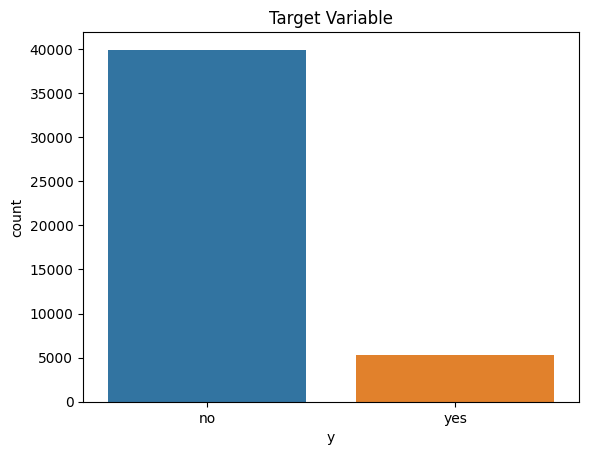

In [51]:
sns.countplot(x="y", data=df)
plt.title("Target Variable")
plt.show()

In [52]:
# percentage of class present in target variable(y) 
print("percentage of NO and YES\n",df["y"].value_counts()/len(df)*100)

percentage of NO and YES
 no     88.299967
yes    11.700033
Name: y, dtype: float64


The class distribution in the target variable is - 89:11 indicating an imbalance dataset

## Features vs Target
# Categorical Variable vs Target (Categorical) -- Job, Marital, Educational Qualification, Call Type, Month

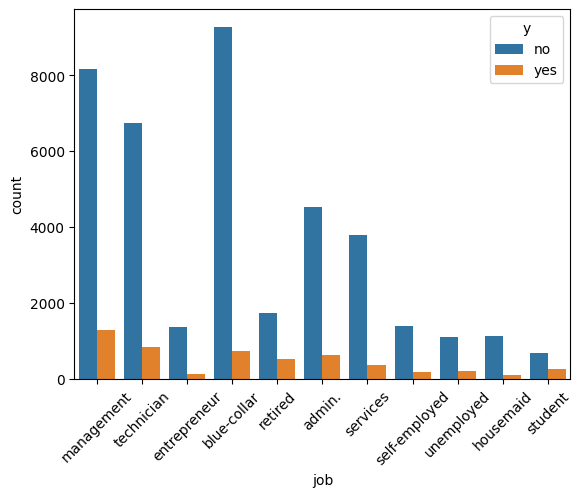

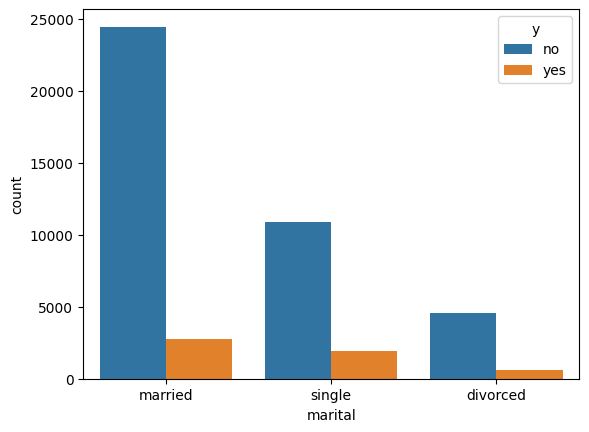

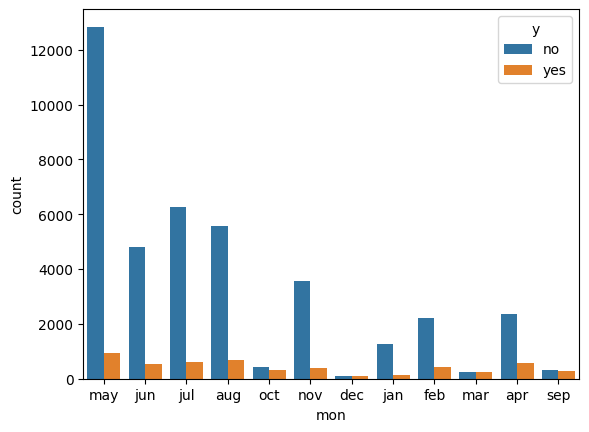

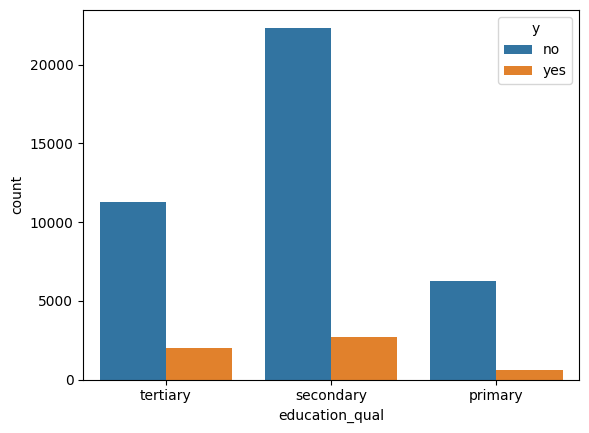

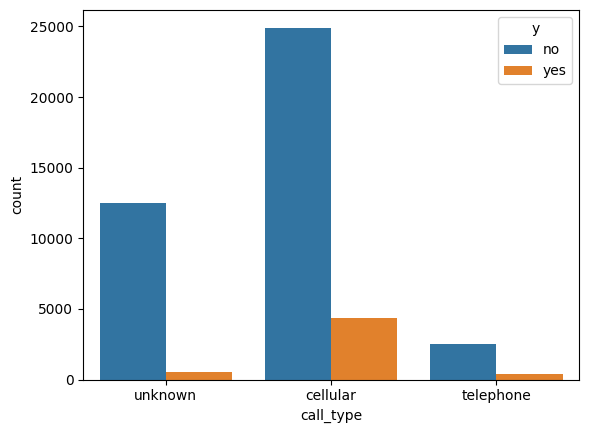

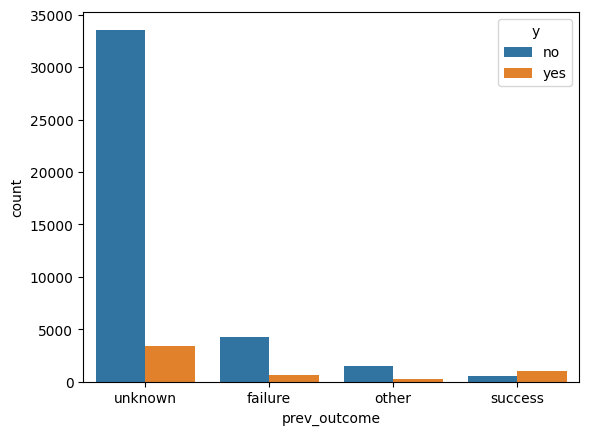

In [53]:
# Distribution of categorical variables
sns.countplot(x='job', data=df, hue='y')
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='marital', data=df, hue='y')
plt.show()

sns.countplot(x='mon', data=df, hue='y')
plt.show()

sns.countplot(x='education_qual', data=df, hue='y')
plt.show()

sns.countplot(x='call_type', data=df, hue='y')
plt.show()

sns.countplot(x='prev_outcome', data=df, hue='y')
plt.show()

Observations:

**Categorical Data Vs Target**

Jobs vs Target

*  Target (No) : Blue Collar
*  Suscribed (Yes): Management



Marital Status vs Target

*   Target (No) : Married
*   Subscribed (Yes): Married

Month vs Target

*   Target (No): May
*   Subscribed (Yes): May


Educational Qualification vs Target

*   Target (No): Secondary
*   Subscribed (Yes): Secondary



Call Type vs Target

*   Target (No): Cellular
*   Subscribed (Yes): Cellular


Previous Outcome vs Target

*   Target (No): unknown
*   Subscribed (Yes): unknown





# Numerical Variable vs Target -- Age, Day, Duration, No of Calls

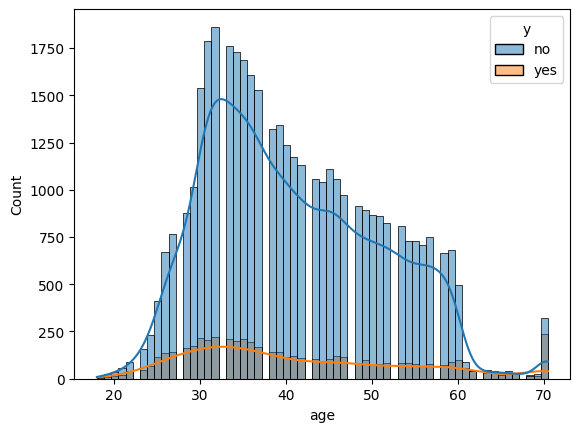

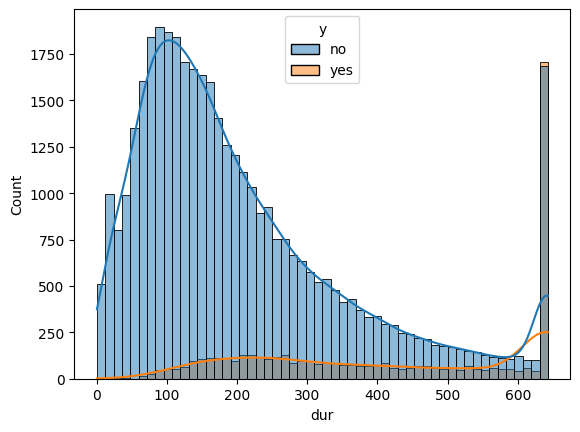

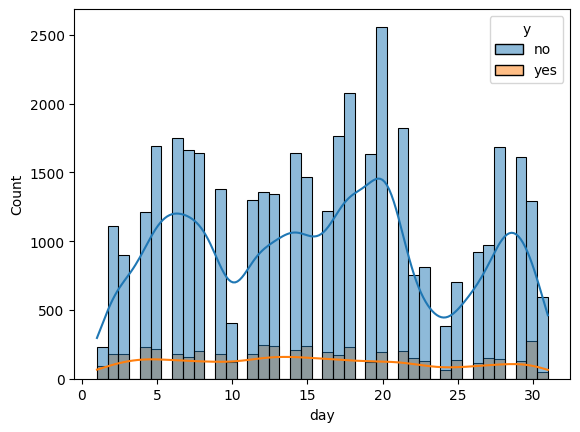

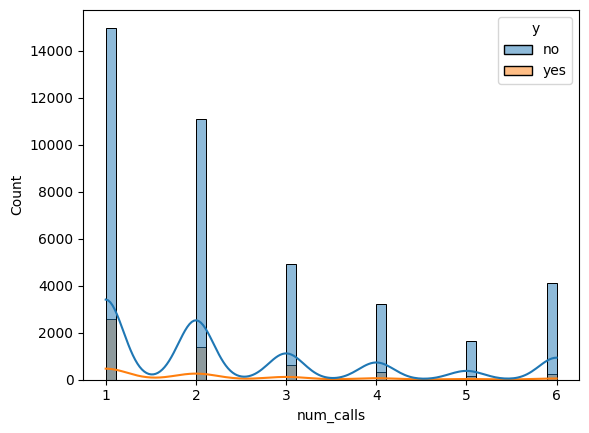

In [54]:
sns.histplot(data=df, x='age',hue='y', kde=True)
plt.show()


sns.histplot(data=df, x='dur', hue='y', kde=True)
plt.show()


sns.histplot(data=df, x='day', hue='y', kde=True)
plt.show()

sns.histplot(data=df, x='num_calls', hue='y', kde=True)
plt.show()

observations:

Numeric Data vs Target

Age vs Target

*   Target : Middle age people
*   Subscribed : Middle age people

Day vs Target

*  Target : Middle of Month
*  Subscribed : Middle of Month

Duration vs Target

* Duration of call is also important to subscribe for insurance.

No of Calls vs Target

* No of calls increase subscrition also getting increase. 






# Feature VS Target Distribution - Percentage of people Subscribed

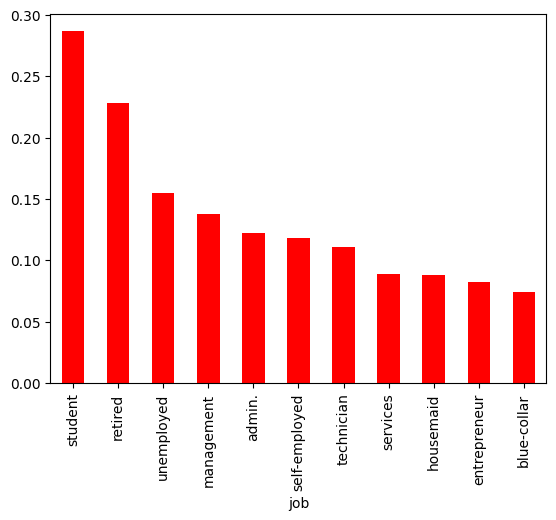

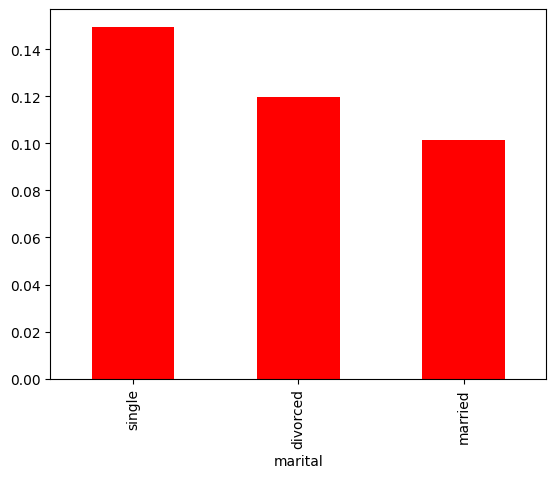

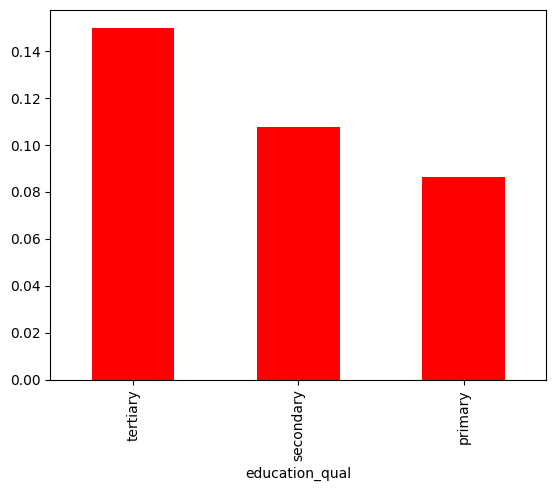

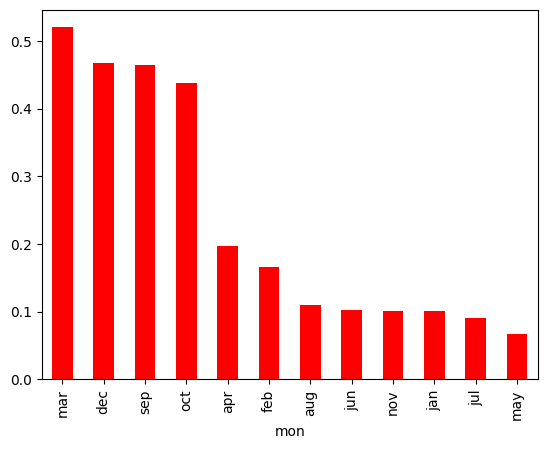

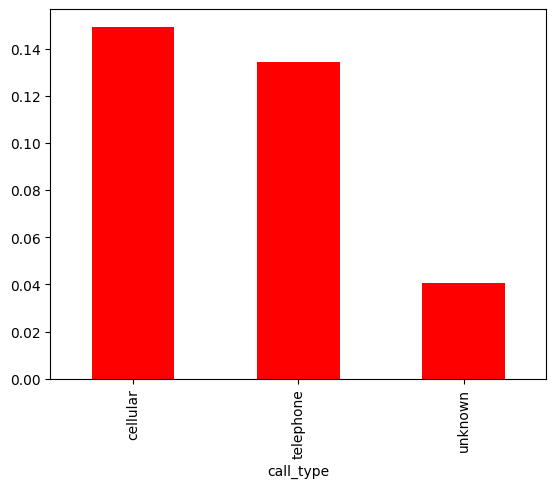

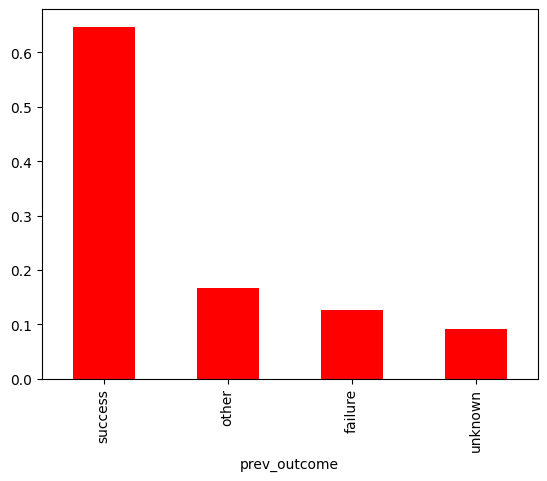

In [55]:
#Jobs vs Target
df.groupby('job')['target'].mean().sort_values(ascending=False).plot(kind="bar",color='red')
plt.show()
#Marital Status vs Target
df.groupby('marital')['target'].mean().sort_values(ascending=False).plot(kind="bar",color='red')
plt.show()
#Educational Qualification vs Target
df.groupby('education_qual')['target'].mean().sort_values(ascending=False).plot(kind="bar",color='red')
plt.show()
#Month vs Target
df.groupby('mon')['target'].mean().sort_values(ascending=False).plot(kind="bar",color='red')
plt.show()
#Call Type vs Target
df.groupby('call_type')['target'].mean().sort_values(ascending=False).plot(kind="bar",color='red')
plt.show()
#Previous Outcome vs Target
df.groupby('prev_outcome')['target'].mean().sort_values(ascending=False).plot(kind="bar",color='red')
plt.show()



Percentage of people Subscribed -- Categorical Data Vs Target (Categorical)

Jobs vs Target

*   Most subscribed % : Student, retired
*   Least Subscribed % : blue-collar

Marital Status vs Target

*  Most subscribed % : Single
*  Least Subscribed % : Married

Educational Qualification vs Target

*   Most subscribed % : teritary
*   Least Subscribed % : primary

Month vs Target

*  Most subscribed % : March, September
*  Least Subscribed % : May

Call Type vs Target

*  Most subscribed % : Cellular
* Least Subscribed % : unknown

Previous Outcome vs Target

*   Most subscribed % : Success
*   Least Subscribed % : unknown






# **Encoding**

In [56]:
from sklearn.preprocessing import LabelEncoder
# encode categorical variables
le = LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['mon'] = le.fit_transform(df['mon'])
df['education_qual'] = le.fit_transform(df['education_qual'])
df['call_type'] = le.fit_transform(df['call_type'])
df['prev_outcome'] = le.fit_transform(df['prev_outcome'])
df['y'] = le.fit_transform(df['y'])

In [57]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,4,1,2,2,5,8,261.0,1.0,3,0,0
1,44.0,9,2,1,2,5,8,151.0,1.0,3,0,0
2,33.0,2,1,1,2,5,8,76.0,1.0,3,0,0
3,47.0,1,1,1,2,5,8,92.0,1.0,3,0,0
4,33.0,1,2,1,2,5,8,198.0,1.0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,1,2,0,17,9,643.0,3.0,3,1,1
45207,70.5,5,0,0,0,17,9,456.0,2.0,3,1,1
45208,70.5,5,1,1,0,17,9,643.0,5.0,2,1,1
45209,57.0,1,1,1,1,17,9,508.0,4.0,3,0,0


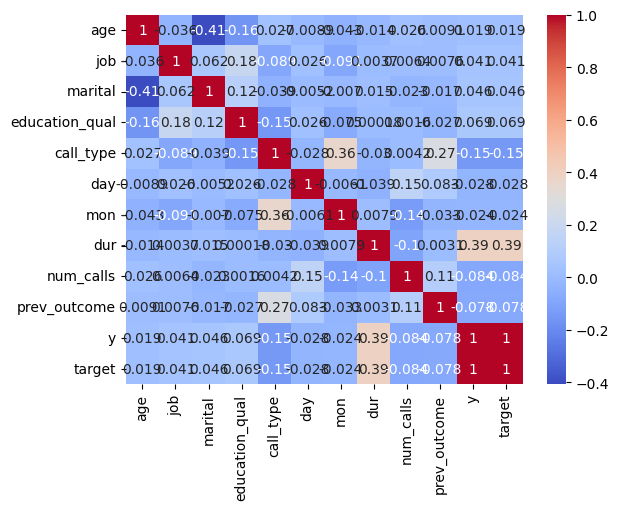

In [58]:
# calculate correlation matrix
corr = df.corr()

# plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# **Feature and Target Selection**

In [59]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [60]:
# X --> Feature y-- >y

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y=df['y'].values

# **Spliting**

In [61]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 3 )

**Balancing**

In [62]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [63]:
len(x_train_smt),len(y_train_smt)

(53056, 53056)

**Scaling**

In [64]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)#only transform the test dataset, dont fit it

# **MODEL**

# Logistic Regression

AUROC score LogisticRegression :   0.8599619247347005


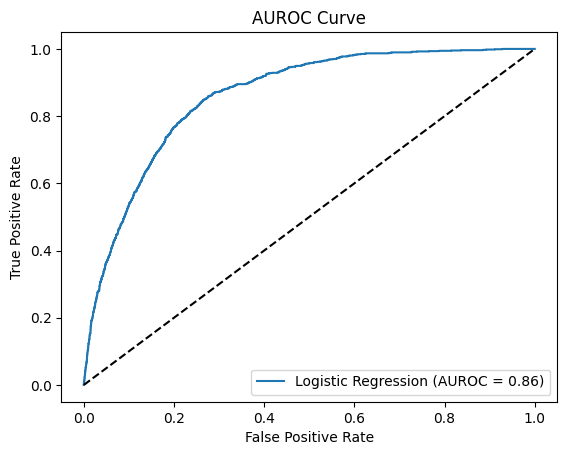

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

lr = LogisticRegression()
lr.fit(x_train_scaled, y_train_smt)

y_pred_prob = lr.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
log_reg_auroc = roc_auc_score(y_test, y_pred_prob)
print("AUROC score LogisticRegression :  ",log_reg_auroc)
plt.plot(fpr, tpr, label='Logistic Regression (AUROC = %0.2f)' % log_reg_auroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curve')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbour (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(x_train_scaled, y_train_smt) 
  print("K value :", i, "Train Score : ", knn.score(x_train_scaled,y_train_smt), "Cross Value Accuracy :" , np.mean(cross_val_score(knn, x_train_scaled, y_train_smt,cv=10, scoring = "roc_auc")))

K value : 1 Train Score :  1.0 Cross Value Accuracy : 0.9628028483719202
K value : 2 Train Score :  0.9944971072121818 Cross Value Accuracy : 0.9713775856819741
K value : 3 Train Score :  0.9775172907675782 Cross Value Accuracy : 0.9756567184939303
K value : 4 Train Score :  0.9769896161166914 Cross Value Accuracy : 0.9780814016280918
K value : 5 Train Score :  0.9668318790871229 Cross Value Accuracy : 0.9791622377933002
K value : 6 Train Score :  0.9662665133897442 Cross Value Accuracy : 0.9795302364798092
K value : 7 Train Score :  0.9592182876957579 Cross Value Accuracy : 0.9797632807822103
K value : 8 Train Score :  0.9587283040913631 Cross Value Accuracy : 0.9794334473015249
K value : 9 Train Score :  0.952754273222396 Cross Value Accuracy : 0.978899615782634
K value : 10 Train Score :  0.9516612328741307 Cross Value Accuracy : 0.9787219722646249
K value : 20 Train Score :  0.929555434106628 Cross Value Accuracy : 0.9740042288959476
K value : 30 Train Score :  0.9186627216704671 C

k=7 is a good cross validation accuracy of 0.9796

KNN Score:  0.8105298086494857
AUROC on the sampled dataset :  0.8730857932605091


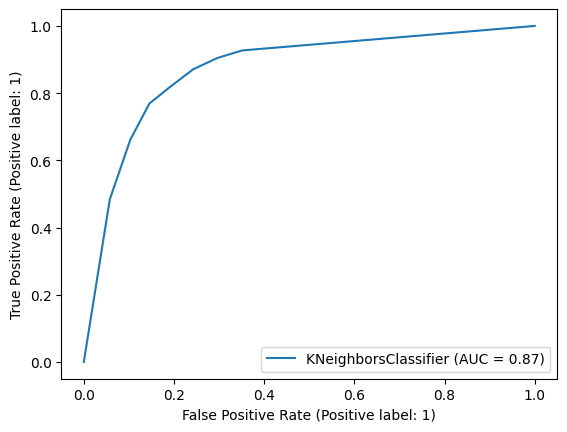

In [ ]:
knn= KNeighborsClassifier(7)
knn.fit(x_train_scaled, y_train_smt)
print("KNN Score: ",knn.score(x_test_scaled,y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(x_test_scaled)[:, 1]))
rfc_disp = RocCurveDisplay.from_estimator(knn, x_test_scaled, y_test)

# Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(x_train_smt, y_train_smt) # the model is trained
  trainAccuracy = accuracy_score(y_train_smt, dt.predict(x_train_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, x_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.7880255545295215  Cross val score :  0.8817608663765707
Depth  :  2  Training Accuracy :  0.8059853381829146  Cross val score :  0.8782210433677211
Depth  :  3  Training Accuracy :  0.8693628328590544  Cross val score :  0.8889494206228914
Depth  :  4  Training Accuracy :  0.882724308840435  Cross val score :  0.8952547303574049
Depth  :  5  Training Accuracy :  0.9108795205698886  Cross val score :  0.8973563780374517
Depth  :  6  Training Accuracy :  0.9183611932985319  Cross val score :  0.8989052950667382
Depth  :  7  Training Accuracy :  0.9294046699206604  Cross val score :  0.8970241529359997
Depth  :  8  Training Accuracy :  0.9360571396264817  Cross val score :  0.8940374272722826
Depth  :  9  Training Accuracy :  0.9464033318885099  Cross val score :  0.8942585439788784
Depth  :  10  Training Accuracy :  0.9531123381640692  Cross val score :  0.8931523492886129
Depth  :  20  Training Accuracy :  0.9978516103499614  Cross val score :  0.8744

Depth=6 is the good cross validation score of 0.898

Decision Tree Score :  0.8233602477602036
AUROC on the sampled dataset :  0.8838719076167897


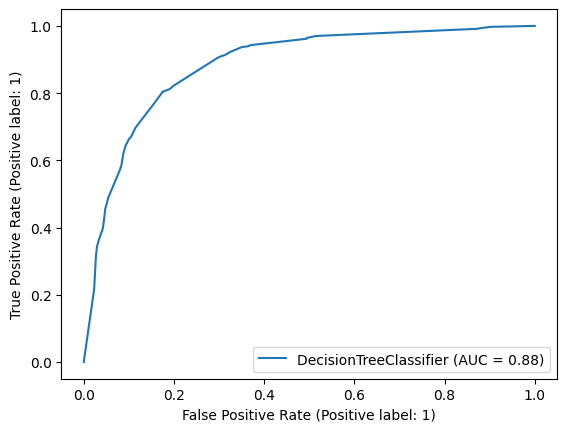

In [ ]:
dt = DecisionTreeClassifier(max_depth=6) 
dt.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", dt.score(x_test, y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dt.predict_proba(x_test)[:, 1]))
rfc_disp = RocCurveDisplay.from_estimator(dt, x_test, y_test)


# **Random Forest**

In [68]:
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier


for depth in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, max_features="sqrt")
    rf.fit(x_train_smt, y_train_smt)
    trainAccuracy = rf.score(x_train_smt, y_train_smt)
    rf = RandomForestClassifier(max_depth=depth, n_estimators=100, max_features="sqrt")
    valAccuracy = np.mean(cross_val_score(rf, x_train_smt, y_train_smt, cv=10))
    print("Depth: ", depth, "Training Accuracy: ", trainAccuracy, "Cross-Validation Accuracy: ", valAccuracy)

Depth:  1 Training Accuracy:  0.8193041314837153 Cross-Validation Accuracy:  0.8097860583558599
Depth:  2 Training Accuracy:  0.8708157418576599 Cross-Validation Accuracy:  0.8683280997487239
Depth:  3 Training Accuracy:  0.8877789505428226 Cross-Validation Accuracy:  0.8929815303430079
Depth:  4 Training Accuracy:  0.9080594089264173 Cross-Validation Accuracy:  0.9085690305606052
Depth:  5 Training Accuracy:  0.9213472557297949 Cross-Validation Accuracy:  0.9208391083947076
Depth:  6 Training Accuracy:  0.9327879975874548 Cross-Validation Accuracy:  0.9288496901947646
Depth:  7 Training Accuracy:  0.9400256332931243 Cross-Validation Accuracy:  0.9344477238969416
Depth:  8 Training Accuracy:  0.9470559408926418 Cross-Validation Accuracy:  0.9396875232029751
Depth:  9 Training Accuracy:  0.955424457177322 Cross-Validation Accuracy:  0.9464917563493108
Depth:  10 Training Accuracy:  0.9614369722557298 Cross-Validation Accuracy:  0.950167274577213


Depth=10 is the good cross validation score of 0.950

RandomForest score :  0.8608560999889393
AUROC on the sampled dataset :  0.9121139962741437


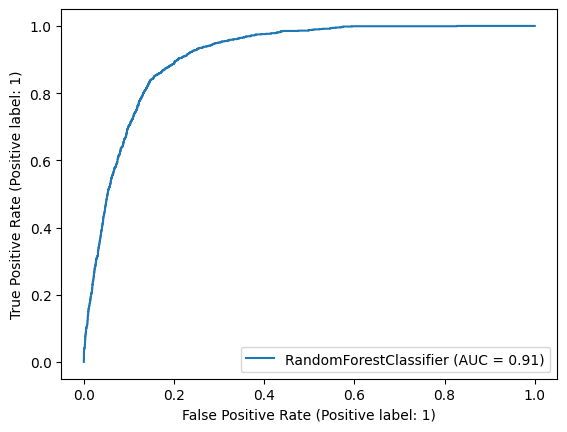

In [ ]:
rf= RandomForestClassifier(max_depth=10,n_estimators=100,max_features="sqrt") 
rf.fit(x_train_smt,y_train_smt) 
print("RandomForest score : ", rf.score(x_test, y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, rf.predict_proba(x_test)[:, 1]))
rfc_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test)

# XG Boost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 

for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model 
  model.fit(x_train_smt,y_train_smt) #train the model 
  print("Learning rate : ", lr," Train score : ", model.score(x_train_smt,y_train_smt)," Cross-Val score : ", np.mean(cross_val_score(model, x_train_smt,y_train_smt, cv=10)))

Learning rate :  0.01  Train score :  0.9354352373593653  Cross-Val score :  0.9300663959604731
Learning rate :  0.02  Train score :  0.9475717543297589  Cross-Val score :  0.9403751319918199
Learning rate :  0.03  Train score :  0.9564479957786028  Cross-Val score :  0.9481208491426987
Learning rate :  0.04  Train score :  0.9613478318225506  Cross-Val score :  0.9524178536253245
Learning rate :  0.05  Train score :  0.9656069200761359  Cross-Val score :  0.955979763018085
Learning rate :  0.1  Train score :  0.9748789175131447  Cross-Val score :  0.9599000026350423
Learning rate :  0.11  Train score :  0.9754631287337693  Cross-Val score :  0.960992959181492
Learning rate :  0.12  Train score :  0.9765373235587886  Cross-Val score :  0.9608611538032928
Learning rate :  0.13  Train score :  0.9775172907675782  Cross-Val score :  0.9603335380995492
Learning rate :  0.14  Train score :  0.9785726400693515  Cross-Val score :  0.9614830308610316
Learning rate :  0.15  Train score :  0.978

Learning Rate 0.2 is getting the best cross validation score of 0.961

Decision Tree Score :  0.8887291228846367
AUROC on the sampled dataset :  0.9287247531937083


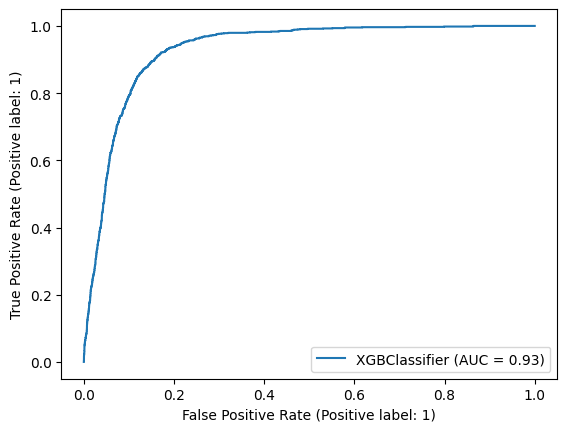

In [ ]:
model = xgb.XGBClassifier(learning_rate =0.2, n_estimators=100, verbosity = 0 )
model.fit(x_train_smt,y_train_smt) 
print("Decision Tree Score : ", model.score(x_test, y_test)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, model.predict_proba(x_test)[:, 1]))
rfc_disp = RocCurveDisplay.from_estimator(model, x_test, y_test)


Models are tested, below are the AUROC value of each model

**Logistic Regression** - AUROC Score is 0.86

**KNN** - AUROC Score is 0.87

**Decision Tree** - AUROC Score is 0.88

**Random Forest**- AUROC Score is 0.91

**XG Boost** - AUROC Score is 0.93 

Hence XG Boost is giving the good AUROC Score of 0.93, so XG Boost is the best model for customer conversion prediction

# **Feature Importance**

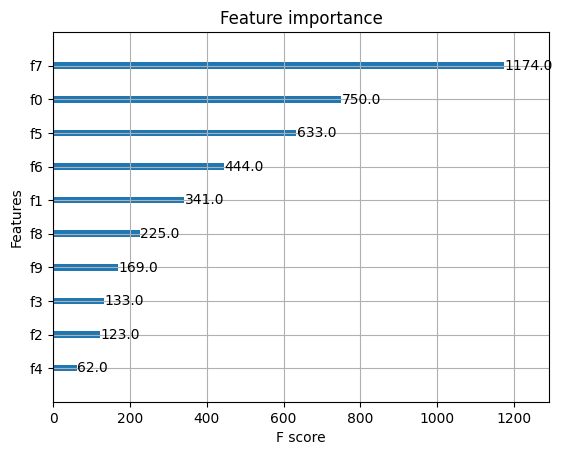

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

f0 - Age, f1 - Job, f2 - marital status, f3- educational qualification, f4 - call type, f5 - day, f6 - mon, f7 -dur, f8 - number of calls, f9 - previous outcome 

**dur is the Feature Importance**

# **conclusion**

As our evalution metrix is AUROC.The result obtain from evaluation of the five classification models (Logistic Regression,K-Nearest Neighbour,Decision Tree Classifier,Random forest, XGBoost) on the given historical data, XGBoost outperformed the other models with the highest AUROC score of 0.93.

This implies that XGBoost is a suitable model for predicting whether a client will subscribe to the insurance or not.It is recommended to deploy this model, will help company for cost effective tele marketing campaigns with better customer conversion ratio.

Based on the Feature Importance given by best machine Learning,company should target on them for better customer conversion,to subscribe the term insurance.